In [30]:
## Importing packages and sub packages 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [31]:
## Importing data

df=pd.read_csv("Outbreak_India.csv")
df=df.drop(axis = 1, columns = 'Serial no')
df=df.rename(columns = {'Name of \n State/UT' : 'Name of State/UT', 'Date of \n start of \n outbreak' : 'Start of outbreak', 'Disease/ Illness':'Disease/Illness'})
df['No. of Cases']=pd.to_numeric(df['No. of Cases'], errors='coerce')
df['No. of Deaths']=pd.to_numeric(df['No. of Deaths'], errors='coerce')
df=df.dropna()
df.head()

,Name of State/UT,Name of \n District,Disease/Illness,No. of Cases,No. of Deaths,Start of outbreak,Date Reported,Current Status,Comments
0,Karnataka,? Shimoga,Typhoid Fever,38.0,0.0,10-05-14,Reported late,Under \n Control,Cases of fever reported from Surya Nursing Col...
1,Jammu & \n Kashmir,09 Districts,Dengue,66.0,0.0,02-09-15,Reported late,Under Surveillance,Cases of fever with headache and body ache wer...
2,Jharkhand,10 Districts,Japanease Encephalitis,180.0,2.0,18-04-15,Reported late,Under surveillance,"Cases of fever reported from Ranchi,East, Sing..."
3,Jharkhand,20 Districts,Dengue,169.0,0.0,21-07-15,Reported late,Under surveillance,Cases of fever with joint pain reported from R...
4,West Bengal,24 South Paragnas,Food Poisoning,65.0,0.0,30-04-18,01-05-18,Under Surveillanc e,Cases of vomiting with loose stools reported a...


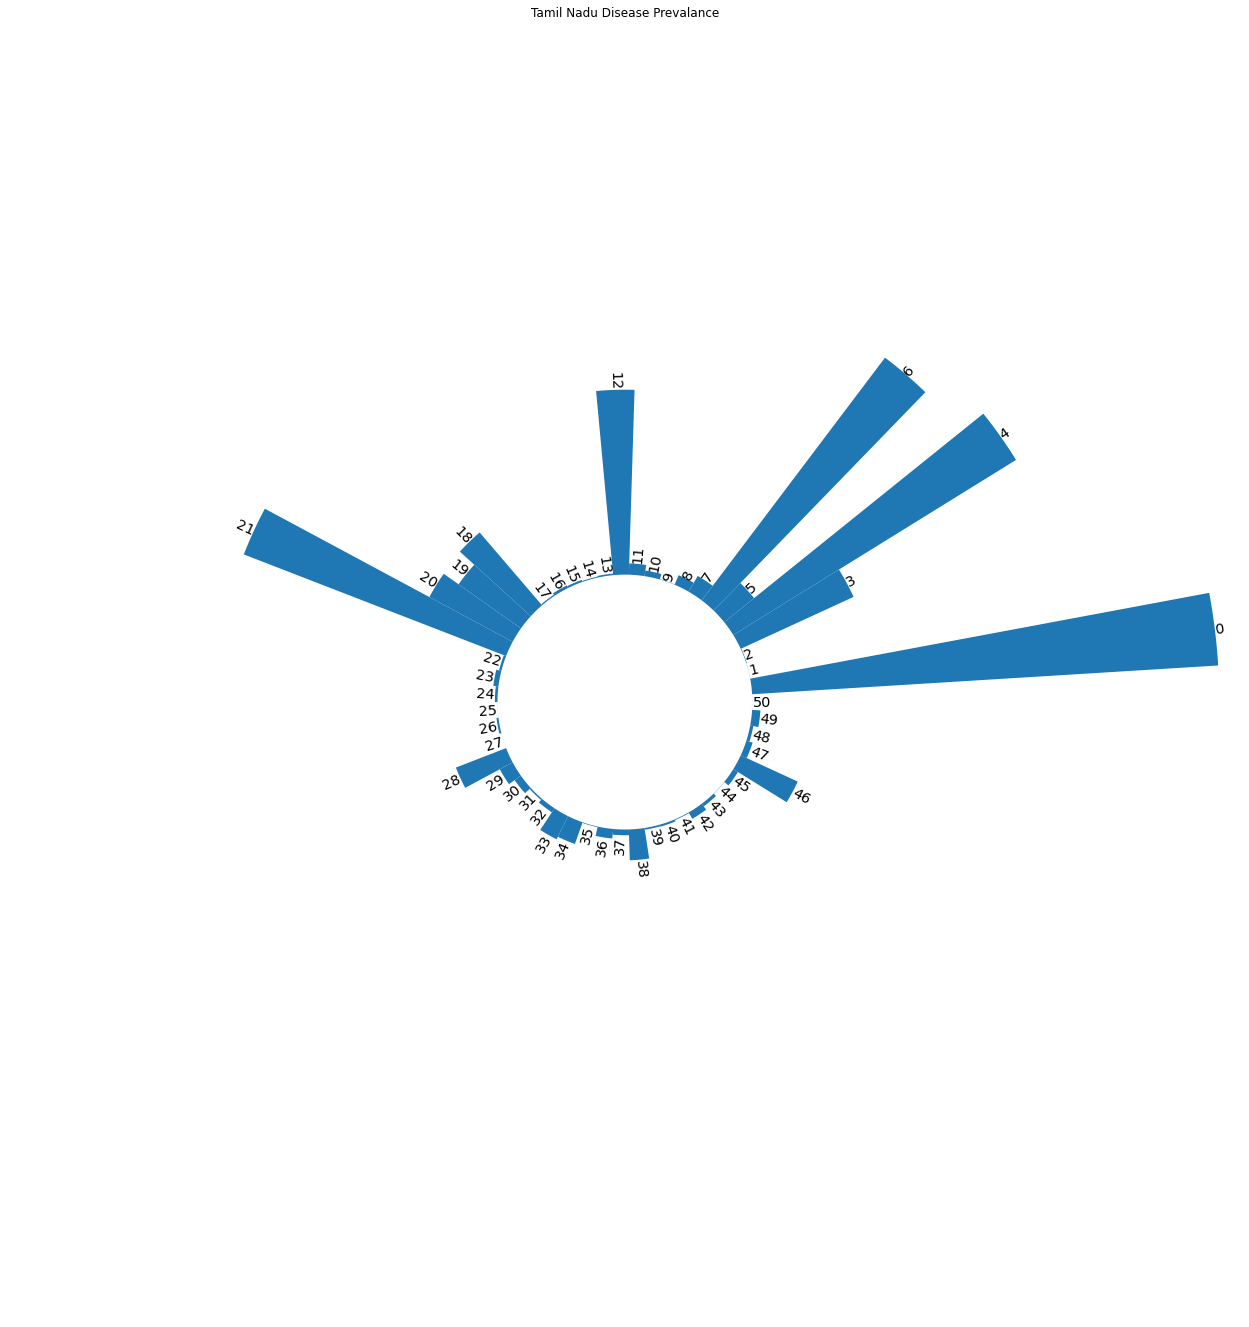

0                             Acute Diarrhoeal Disease
1                                              Anthrax
2                                Castor Seed Poisoning
3                                           Chickenpox
4                                       Chikunguny\n a
5                                              Cholera
6                                               Dengue
7                           Dengue \n & \n Chikungunya
8                               Dengue & Leptospirosis
9                                           Diphtheria
10                                    Enteric \n Fever
11                                       Enteric Fever
12                                               Fever
13                                 Fever & Chikungunya
14                               Fever & Leptospirosis
15                                    Fever with Cough
16                                     Fever with Rash
17                                Fever with body pain
18        

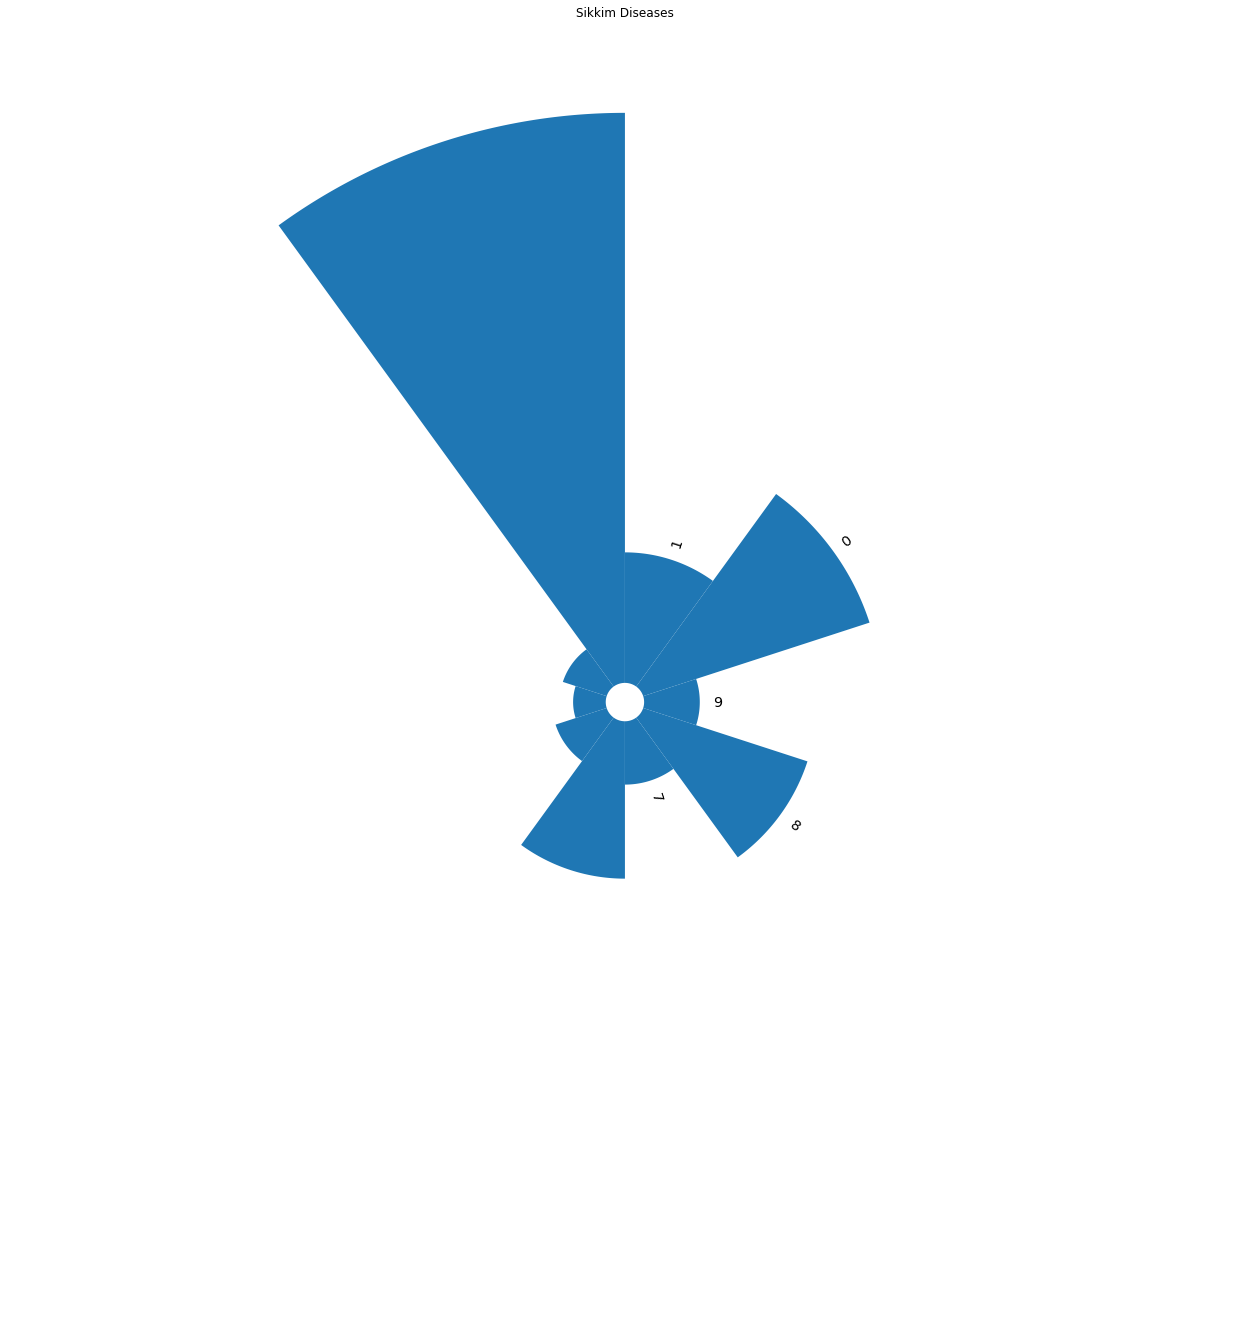

0    Acute Diarrhoeal Disease
1                  Chickenpox
2                      Dengue
3                    Diarrhea
4                       Fever
5             Fever with Rash
6          Food \n Poisioning
7              Food Poisoning
8                     Measles
9             Scrub \n Typhus
Name: Disease/Illness, dtype: object


In [32]:
## QUESTION 6A


tn=df[(df['Name of State/UT']=='Tamil Nadu')]
sk=df[(df['Name of State/UT']=='Sikkim')]

tn=tn.groupby(['Disease/Illness'])
sk=sk.groupby(['Disease/Illness'])


tn_sum=tn.aggregate(np.sum)
tn_sum=tn_sum.reset_index()
tn_diseases, tn_infections=tn_sum['Disease/Illness'],tn_sum['No. of Cases']

sk_sum=sk.aggregate(np.sum)
sk_sum=sk_sum.reset_index()
sk_diseases, sk_infections=sk_sum['Disease/Illness'],sk_sum['No. of Cases']

# Tamil Nadu histogram

tn_width=2*np.pi/len(tn_diseases)
tn_index=list(range(1,len(tn_diseases)+1))
tn_angles=[i*tn_width for i in tn_index]
lowerlimit_tn=2000

plt.figure(figsize=(50,50))
ax1 = plt.subplot(221, polar=True)
bars1 = ax1.bar(tn_angles, height=tn_infections, width=tn_width, bottom=lowerlimit_tn)
plt.axis('off')

# adding labels
labelPadding = 7
for bar1, angle1, label in zip(bars1, tn_angles, range(len(tn_diseases))):

    rotation = np.rad2deg(angle1)

    alignment = ""
    if angle1 >= np.pi/2 and angle1 < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    ax1.text(
        x=angle1, 
        y=bar1.get_height() + labelPadding + lowerlimit_tn, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor", fontsize='x-large')

plt.title("Tamil Nadu Disease Prevalance")
plt.show()
print(tn_diseases)

# Sikkim Histogram

sk_width=2*np.pi/len(sk_diseases)
sk_index=list(range(1,len(sk_diseases)+1))
sk_angles=[i*sk_width for i in sk_index]
lowerlimit_sk = 10

plt.figure(figsize=(50, 50))
ax2=plt.subplot(222,polar=True)
bars2=ax2.bar(sk_angles,height=sk_infections,width=sk_width,bottom=lowerlimit_sk)
plt.axis('off')
# adding labels
labelPadding = 7
for bar2, angle2, label in zip(bars2, sk_angles,range(len(sk_diseases))):
    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle2)
    # Flip some labels upside down
    alignment = ""
    if angle2 >= np.pi/2 and angle2 < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"
        ax2.text(
        x=angle2,
        y=bar2.get_height() + labelPadding + lowerlimit_sk,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor", fontsize='x-large')
plt.title("Sikkim Diseases")
plt.show()
print(sk_diseases)

,Name of State/UT,Name of \n District,Disease/Illness,No. of Cases,No. of Deaths,Start of outbreak,Date Reported,Current Status,Comments
2633,Maharashtra,"BMC,Pune, Nagpur, Latur,Auran gabad Nashik,Kol...",Seasonal Influenza A(H1N1),5392.0,550.0,01-01-15,Reported late,Under surveillance,5304 Cases and 542 deaths were reported from B...
8817,Kerala,"Kozhikode, Mallapuram, Thrissur and Kannur",Seasonal Influenza A(H1N1),599.0,55.0,01-01-15,Reported late,Under surveillance,474 Cases and 50 deaths were reported from all...
13233,Chhattisgarh,Raipur,Seasonal Influenza A(H1N1),6.0,2.0,06-09-15,Reported late,Under Surveillance,Cases reported from different areas of Distric...


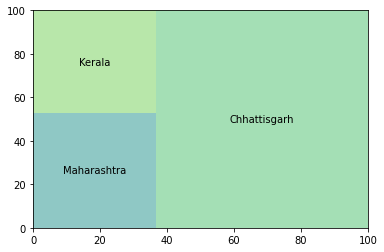

In [33]:
## QUESTION 6B


import squarify

H1N1=df[df['Disease/Illness']=='Seasonal Influenza A(H1N1)']

squarify.plot(sizes=H1N1['No. of Deaths']/H1N1['No. of Cases'],label=H1N1['Name of State/UT'],alpha=.5)
H1N1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


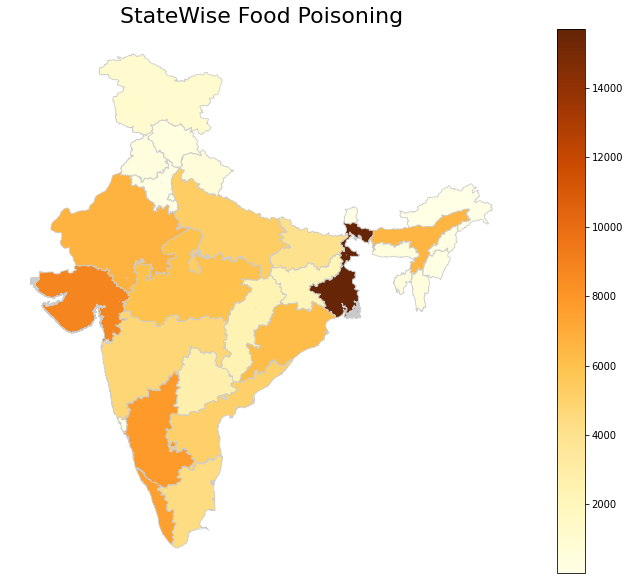

In [34]:
## QUESTION 6C
import geopandas

food_poison = df[df['Disease/Illness']=='Food Poisoning']

IN="Indian_States.shp"
map_df=geopandas.read_file(IN)

food_poison.replace('M\n anipur', 'Manipur',inplace=True)
food_poison.replace('Delhi', 'NCT of Delhi',inplace=True)
food_poison.replace('Orissa', 'Odisha',inplace=True)
food_poison.replace('Arunachal Pradesh', 'Arunanchal Pradesh',inplace=True)
food_poison.replace('Uttar \n Pradesh', 'Uttar Pradesh',inplace=True)
food_poison.replace('Madhya \n Pradesh', 'Madhya Pradesh',inplace=True)
food_poison.replace('Jammu & \n Kashmir', 'Jammu & Kashmir',inplace=True)
food_poison.replace('Himachal \n Pradesh', 'Himachal Pradesh',inplace=True)
food_poison.replace('Dadar & \n Nagar Haveli', 'Dadara & Nagar Havelli',inplace=True)
food_poison.replace('Daman & \n Diu', 'Daman & Diu',inplace=True)
food_poison.replace('Andaman & \n Nicobar \n Islands', 'Andaman & Nicobar Island',inplace=True)

data = {'Name of State/UT':[],'No. of Food Poison Cases':[]}
for item in food_poison["Name of State/UT"]:
  if item not in data['Name of State/UT']:
    data['Name of State/UT'].append(item)
    data['No. of Food Poison Cases'].append(sum(food_poison[food_poison['Name of State/UT']==item]['No. of Cases']))
food_poison_agg = pd.DataFrame(data=data)
merged = map_df.set_index('st_nm').join(food_poison_agg.set_index('Name of State/UT'))
merged.head()
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.axis('off')
ax.set_title('StateWise Food Poisoning', fontdict={'fontsize': '22','fontweight' : '3'})
merged.plot(column='No. of Food Poison Cases', cmap='YlOrBr', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


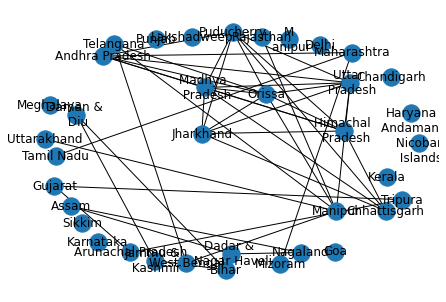

In [35]:
## QUESTION 6D 

import networkx as net

df['case_fatality_ratio']=df['No. of Deaths']/df['No. of Cases']
states=df['Name of State/UT'].unique()

result_states=[]

for j in range(len(states)):    
    sdf=df.loc[df['Name of State/UT'] == states[j]]
    sdf=sdf[['Disease/Illness', 'case_fatality_ratio']]
    sdf=sdf.groupby('Disease/Illness',sort=False).sum()
    x=len(sdf)
    
    for k in range(len(states)):
        a=sdf.values.squeeze(1).tolist();
        rdf = df.loc[df['Name of State/UT'] == states[k]]
        rdf=rdf[['Disease/Illness', 'case_fatality_ratio']]
        rdf=rdf.groupby('Disease/Illness',sort=False).sum()
        y=len(rdf)
        b=rdf.values.squeeze(1).tolist();
        if x < y:
            for i in range(0,y-x):
                a.append(0)
                continue
        else:
            for i in range(0,x-y):
                b.append(0)
                continue
        my_rho = np.corrcoef(a, b)
        if my_rho[0,1]>=0.6 and j!=k:
            result_states.append((states[j],states[k]))
        

G = net.Graph()
G.add_nodes_from(states)
for i in range (0,len(result_states)):
    G.add_edge(result_states[i][0],result_states[i][1],weight=0.0005)
net.draw(G,with_labels=True,width=1)
plt.show()

